In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

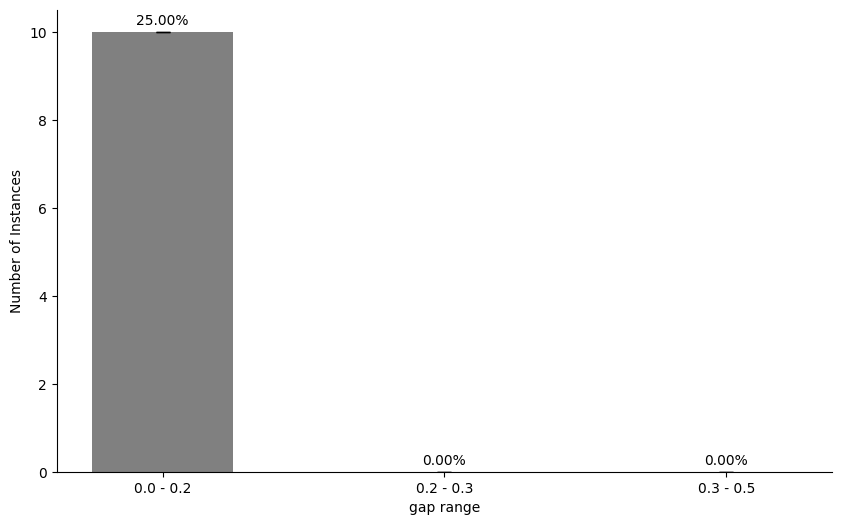

In [13]:
# Data: (number_of_items, gap_value)
data = [
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (500, 0.00),
    (700, 2.76),
    (700, 3.89),
    (700, 5.38),
    (700, 3.77),
    (700, 3.35),
    (700, 2.67),
    (700, 4.57),
    (700, 5.58),
    (700, 4.62),
    (700, 3.61),
    (800, 3.11),
    (800, 5.29),
    (800, 4.85),
    (800, 4.15),
    (800, 3.60),
    (800, 3.84),
    (800, 3.15),
    (800, 2.04),
    (800, 3.28),
    (800, 1.70),
    (1000, 4.44),
    (1000, 3.18),
    (1000, 2.94),
    (1000, 2.94),
    (1000, 3.08),
    (1000, 4.37),
    (1000, 3.24),
    (1000, 2.61),
    (1000, 2.11),
    (1000, 3.07),
]

# Gap ranges
gap_ranges = [0.0, 0.2, 0.3, 0.5]

# Count instances in each gap range and calculate variance
gap_counts = [0] * (len(gap_ranges) - 1)
gap_variances = [0.0] * (len(gap_ranges) - 1)
gap_values_in_ranges = [[] for _ in range(len(gap_ranges) - 1)]

for _, gap in data:
    for i in range(len(gap_ranges) - 1):
        if gap_ranges[i] <= gap < gap_ranges[i + 1]:
            gap_counts[i] += 1
            gap_values_in_ranges[i].append(gap)
            break

for i in range(len(gap_values_in_ranges)):
    if len(gap_values_in_ranges[i]) > 1:
        gap_variances[i] = np.var(gap_values_in_ranges[i], ddof=1)

# Calculate total number of instances
total_instances = len(data)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(gap_counts)), gap_counts, width=0.5, align='center', color='gray', yerr=gap_variances, capsize=5)


# Adding labels
plt.xlabel('gap range')
plt.ylabel('Number of Instances')
# plt.title('Distribuição de Instâncias por Faixa de Gap com Variância')
plt.xticks(range(len(gap_ranges) - 1), [f'{gap_ranges[i]} - {gap_ranges[i + 1]}' for i in range(len(gap_ranges) - 1)])

# Remove the frame (square) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)


# Annotate bars with percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_instances) * 100
    plt.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Save the plot as a PNG file
plt.savefig("gap_distribution.png")

# Display the plot
plt.show()

In [3]:
# mean_gaps = df.groupby('numerodeitens').mean()
# mean_gaps

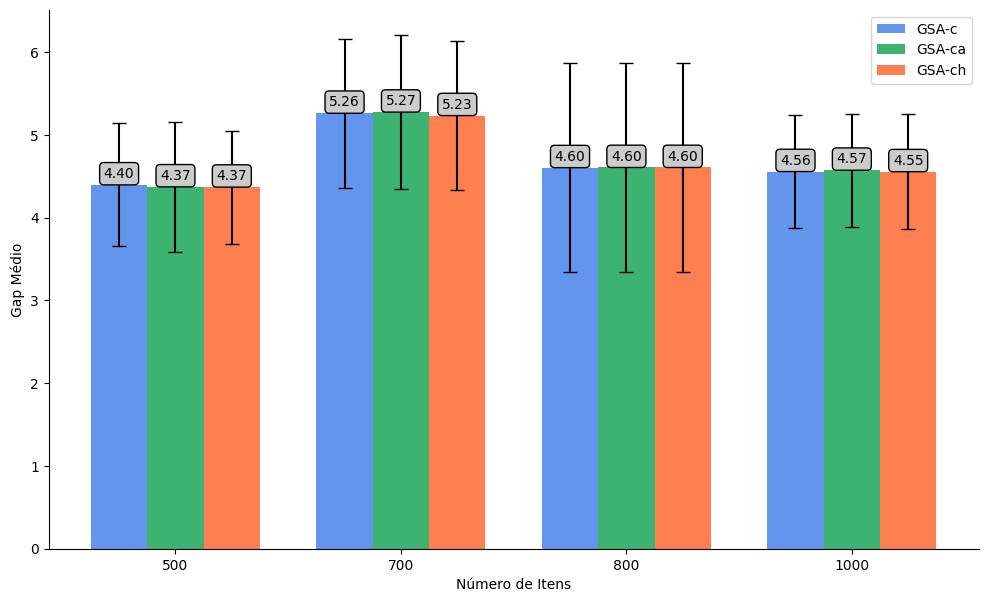

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'numerodeitens': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
                      700, 700, 700, 700, 700, 700, 700, 700, 700, 700,
                      800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
                      1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'GSA-c': [4.42, 3.91, 4.17, 4.5, 4.8, 4.67, 5.98, 3.25, 3.64, 4.61,
              3.93, 5.32, 6.06, 4.28, 5.24, 4.2, 6.49, 6.36, 5.52, 5.2,
              3.61, 5.85, 5.29, 4.96, 4.68, 3.88, 5.51, 4.5, 5.96, 1.79,
              5.5, 4.29, 5.3, 4.2, 3.9, 5.33, 4.29, 5, 4.27, 3.48],
    'GSA-ca': [4.42, 3.91, 4.17, 4.5, 4.8, 4.67, 5.98, 3.01, 3.64, 4.61,
               3.93, 5.32, 6.25, 4.23, 5.24, 4.2, 6.49, 6.36, 5.52, 5.2,
               3.61, 5.85, 5.29, 4.96, 4.68, 3.88, 5.53, 4.5, 5.96, 1.79,
               5.5, 4.29, 5.3, 4.2, 3.9, 5.33, 4.39, 5.06, 4.27, 3.48],
    'GSA-ch': [4.42, 3.91, 4.17, 4.5, 4.8, 4.67, 5.71, 3.25, 3.64, 4.61,
               3.93, 5.11, 6.25, 4.28, 5.15, 4.2, 6.49, 6.19, 5.52, 5.2,
               3.61, 5.85, 5.29, 4.96, 4.68, 3.88, 5.53, 4.5, 5.96, 1.79,
               5.5, 4.21, 5.3, 4.2, 3.9, 5.33, 4.39, 5.06, 4.17, 3.48]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate mean and variance for each method and number of items
mean_gaps = df.groupby('numerodeitens').mean()
var_gaps = df.groupby('numerodeitens').var()

# Bar width
bar_width = 0.25

# Bar positions
index = np.arange(len(mean_gaps))

# Plotting
plt.figure(figsize=(12, 7))

# Plot bars
bars1 = plt.bar(index - bar_width, mean_gaps['GSA-c'], bar_width, yerr=np.sqrt(var_gaps['GSA-c']), capsize=5, label='GSA-c', color='cornflowerblue')
bars2 = plt.bar(index, mean_gaps['GSA-ca'], bar_width, yerr=np.sqrt(var_gaps['GSA-ca']), capsize=5, label='GSA-ca', color='mediumseagreen')
bars3 = plt.bar(index + bar_width, mean_gaps['GSA-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-ch']), capsize=5, label='GSA-ch', color='coral')

# Adding title and labels
plt.xlabel('Número de Itens')
plt.ylabel('Gap Médio')
# plt.title('Comparação dos Gaps Médios por Número de Itens com Variância')
plt.xticks(index, mean_gaps.index)
plt.legend()

# Remove the frame (square) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

# Annotate bars with gap values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', bbox=bbox)

# Save the plot as a PNG file
plt.savefig("gap_comp_pert.png")

# Display the plot
plt.show()


In [5]:
GSA_c = [4.42, 3.05, 3.06, 4.3, 3.24, 3.86, 3.65, 3.01, 2.91, 2.58,
         2.76, 3.89, 5.38, 3.77, 3.35, 2.61, 4.43, 5.58, 4.62, 3.61,
         3.11, 5.29, 4.83, 4.15, 3.6, 3.84, 3.4, 2.04, 3.06, 1.7,
         4.59, 3.14, 2.8, 2.94, 3.08, 4.55, 3.22, 3.03, 2.78, 3.07]

GSA_ca = [4.42, 3.05, 3.06, 4.3, 2.78, 3.86, 3.65, 3.01, 2.91, 2.58,
          2.76, 3.89, 5.38, 3.77, 3.35, 2.61, 4.6, 5.58, 4.62, 3.61,
          2.96, 5.29, 4.85, 4.15, 3.6, 3.84, 3.42, 2.02, 3.38, 1.7,
          4.71, 3.24, 2.96, 3.35, 3.12, 4.55, 3.2, 3.34, 2.13, 3.07]

GSA_ch = [4.42, 3.05, 3.06, 4.26, 2.78, 3.86, 3.16, 3.01, 2.91, 2.58,
          2.76, 3.89, 5.38, 3.77, 3.35, 2.67, 4.57, 5.58, 4.62, 3.61,
          3.11, 5.29, 4.85, 4.15, 3.6, 3.84, 3.15, 2.04, 3.28, 1.7,
          4.44, 3.18, 2.94, 2.94, 3.08, 4.37, 3.24, 2.61, 2.11, 3.07]


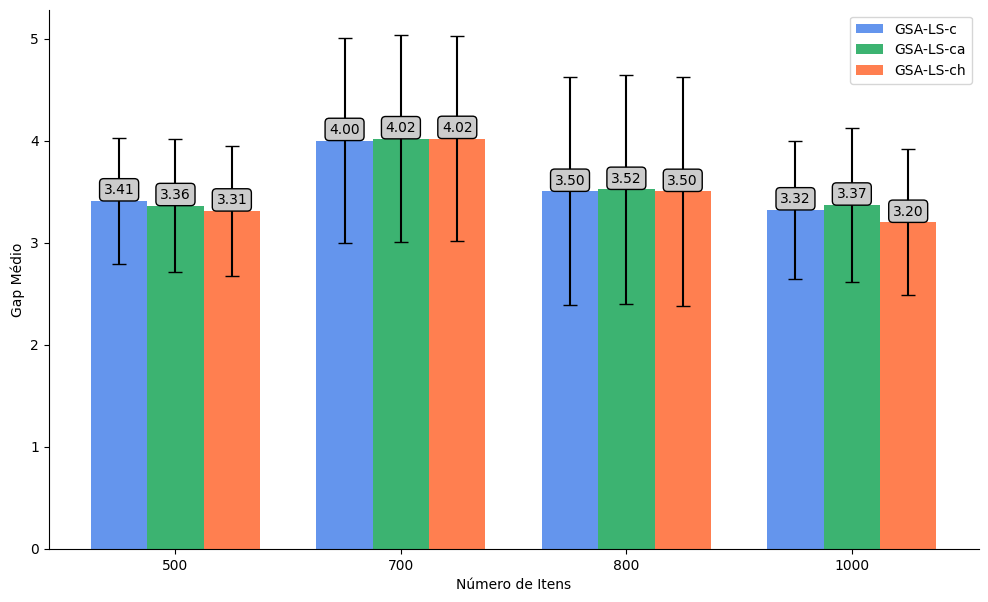

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'numerodeitens': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
                      700, 700, 700, 700, 700, 700, 700, 700, 700, 700,
                      800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
                      1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'GSA-LS-c': [4.42, 3.05, 3.06, 4.3, 3.24, 3.86, 3.65, 3.01, 2.91, 2.58,
                2.76, 3.89, 5.38, 3.77, 3.35, 2.61, 4.43, 5.58, 4.62, 3.61,
                3.11, 5.29, 4.83, 4.15, 3.6, 3.84, 3.4, 2.04, 3.06, 1.7,
                4.59, 3.14, 2.8, 2.94, 3.08, 4.55, 3.22, 3.03, 2.78, 3.07],
    'GSA-LS-ca': [4.42, 3.05, 3.06, 4.3, 2.78, 3.86, 3.65, 3.01, 2.91, 2.58,
                    2.76, 3.89, 5.38, 3.77, 3.35, 2.61, 4.6, 5.58, 4.62, 3.61,
                    2.96, 5.29, 4.85, 4.15, 3.6, 3.84, 3.42, 2.02, 3.38, 1.7,
                    4.71, 3.24, 2.96, 3.35, 3.12, 4.55, 3.2, 3.34, 2.13, 3.07],
    'GSA-LS-ch': [4.42, 3.05, 3.06, 4.26, 2.78, 3.86, 3.16, 3.01, 2.91, 2.58,
          2.76, 3.89, 5.38, 3.77, 3.35, 2.67, 4.57, 5.58, 4.62, 3.61,
          3.11, 5.29, 4.85, 4.15, 3.6, 3.84, 3.15, 2.04, 3.28, 1.7,
          4.44, 3.18, 2.94, 2.94, 3.08, 4.37, 3.24, 2.61, 2.11, 3.07]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate mean and variance for each method and number of items
mean_gaps = df.groupby('numerodeitens').mean()
var_gaps = df.groupby('numerodeitens').var()

# Bar width
bar_width = 0.25

# Bar positions
index = np.arange(len(mean_gaps))

# Plotting
plt.figure(figsize=(12, 7))

# Plot bars
bars1 = plt.bar(index - bar_width, mean_gaps['GSA-LS-c'], bar_width, yerr=np.sqrt(var_gaps['GSA-LS-c']), capsize=5, label='GSA-LS-c', color='cornflowerblue')
bars2 = plt.bar(index, mean_gaps['GSA-LS-ca'], bar_width, yerr=np.sqrt(var_gaps['GSA-LS-ca']), capsize=5, label='GSA-LS-ca', color='mediumseagreen')
bars3 = plt.bar(index + bar_width, mean_gaps['GSA-LS-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-LS-ch']), capsize=5, label='GSA-LS-ch', color='coral')

# Adding title and labels
plt.xlabel('Número de Itens')
plt.ylabel('Gap Médio')
# plt.title('Comparação dos Gaps Médios por Número de Itens com Variância')
plt.xticks(index, mean_gaps.index)
plt.legend()

# Remove the frame (square) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

# Annotate bars with gap values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', bbox=bbox)

# Save the plot as a PNG file
plt.savefig("gap_comp_pert2.png")

# Display the plot
plt.show()


In [7]:
GSA_c = [4.42, 3.23, 3.22, 4.3, 3.96, 3.48, 4.26, 3.01, 2.95, 3.01,
         3.34, 4.68, 5.84, 3.96, 4.77, 3.28, 5.84, 5.55, 4.9, 4.63,
         3.2, 5.24, 5.12, 4.59, 4.21, 3.86, 4.76, 3.4, 5.02, 1.7,
         5.05, 3.73, 4.62, 3.83, 3.58, 4.9, 3.76, 4.65, 3.8, 3.17]

GSA_ca = [4.42, 3.23, 3.22, 4.3, 3.96, 3.86, 4.49, 3.01, 2.91, 2.7,
          3.29, 4.7, 5.82, 3.96, 4.77, 3.28, 5.82, 5.5, 4.95, 4.63,
          3.3, 5.41, 5.12, 4.47, 4.33, 3.86, 4.63, 3.59, 4.93, 1.7,
          5.11, 3.77, 4.56, 3.93, 3.6, 4.9, 3.78, 4.62, 3.76, 3.15]

GSA_ch = [4.42, 3.23, 3.34, 4.3, 3.7, 3.86, 4.3, 3.01, 2.95, 2.93,
          3.29, 4.7, 5.74, 3.9, 4.61, 3.11, 5.65, 5.55, 4.98, 4.6,
          3.27, 5.24, 5.12, 4.44, 4.21, 3.86, 4.56, 3.42, 4.93, 1.7,
          5.13, 3.64, 4.29, 3.93, 3.58, 4.9, 3.67, 4.6, 3.68, 3.15]


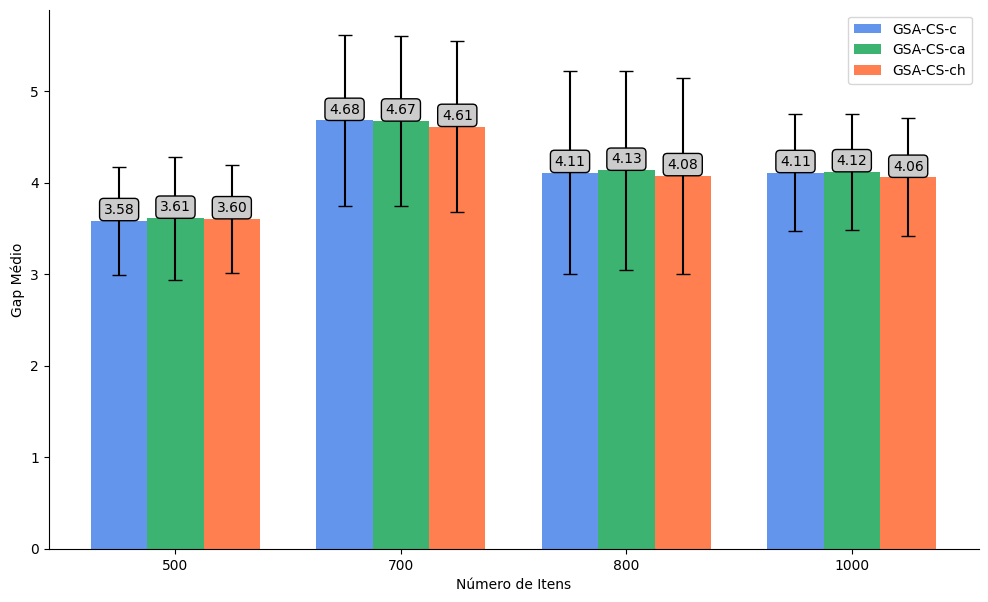

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'numerodeitens': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
                      700, 700, 700, 700, 700, 700, 700, 700, 700, 700,
                      800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
                      1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'GSA-CS-c': [4.42, 3.23, 3.22, 4.3, 3.96, 3.48, 4.26, 3.01, 2.95, 3.01,
         3.34, 4.68, 5.84, 3.96, 4.77, 3.28, 5.84, 5.55, 4.9, 4.63,
         3.2, 5.24, 5.12, 4.59, 4.21, 3.86, 4.76, 3.4, 5.02, 1.7,
         5.05, 3.73, 4.62, 3.83, 3.58, 4.9, 3.76, 4.65, 3.8, 3.17],
    'GSA-CS-ca': [4.42, 3.23, 3.22, 4.3, 3.96, 3.86, 4.49, 3.01, 2.91, 2.7,
          3.29, 4.7, 5.82, 3.96, 4.77, 3.28, 5.82, 5.5, 4.95, 4.63,
          3.3, 5.41, 5.12, 4.47, 4.33, 3.86, 4.63, 3.59, 4.93, 1.7,
          5.11, 3.77, 4.56, 3.93, 3.6, 4.9, 3.78, 4.62, 3.76, 3.15],
    'GSA-CS-ch': [4.42, 3.23, 3.34, 4.3, 3.7, 3.86, 4.3, 3.01, 2.95, 2.93,
          3.29, 4.7, 5.74, 3.9, 4.61, 3.11, 5.65, 5.55, 4.98, 4.6,
          3.27, 5.24, 5.12, 4.44, 4.21, 3.86, 4.56, 3.42, 4.93, 1.7,
          5.13, 3.64, 4.29, 3.93, 3.58, 4.9, 3.67, 4.6, 3.68, 3.15]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate mean and variance for each method and number of items
mean_gaps = df.groupby('numerodeitens').mean()
var_gaps = df.groupby('numerodeitens').var()

# Bar width
bar_width = 0.25

# Bar positions
index = np.arange(len(mean_gaps))

# Plotting
plt.figure(figsize=(12, 7))

# Plot bars
bars1 = plt.bar(index - bar_width, mean_gaps['GSA-CS-c'], bar_width, yerr=np.sqrt(var_gaps['GSA-CS-c']), capsize=5, label='GSA-CS-c', color='cornflowerblue')
bars2 = plt.bar(index, mean_gaps['GSA-CS-ca'], bar_width, yerr=np.sqrt(var_gaps['GSA-CS-ca']), capsize=5, label='GSA-CS-ca', color='mediumseagreen')
bars3 = plt.bar(index + bar_width, mean_gaps['GSA-CS-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-CS-ch']), capsize=5, label='GSA-CS-ch', color='coral')

# Adding title and labels
plt.xlabel('Número de Itens')
plt.ylabel('Gap Médio')
# plt.title('Comparação dos Gaps Médios por Número de Itens com Variância')
plt.xticks(index, mean_gaps.index)
plt.legend()

# Remove the frame (square) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

# Annotate bars with gap values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', bbox=bbox)

# Save the plot as a PNG file
plt.savefig("gap_comp_pert3.png")

# Display the plot
plt.show()


# Comparação entre os métodos

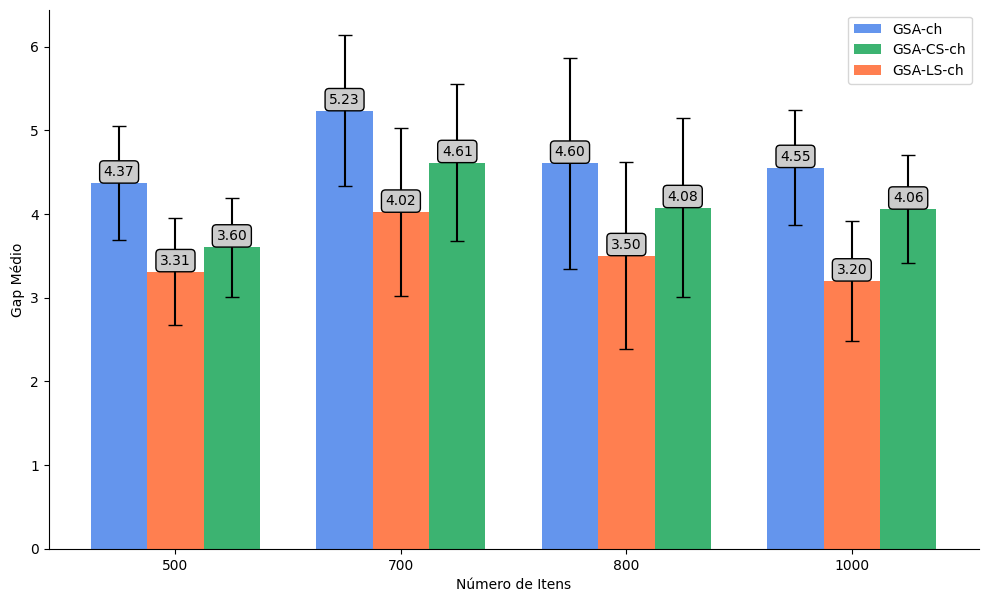

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'numerodeitens': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
                      700, 700, 700, 700, 700, 700, 700, 700, 700, 700,
                      800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
                      1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'GSA-ch': [4.42, 3.91, 4.17, 4.5, 4.8, 4.67, 5.71, 3.25, 3.64, 4.61,
               3.93, 5.11, 6.25, 4.28, 5.15, 4.2, 6.49, 6.19, 5.52, 5.2,
               3.61, 5.85, 5.29, 4.96, 4.68, 3.88, 5.53, 4.5, 5.96, 1.79,
               5.5, 4.21, 5.3, 4.2, 3.9, 5.33, 4.39, 5.06, 4.17, 3.48],
    'GSA-LS-ch': [4.42, 3.05, 3.06, 4.26, 2.78, 3.86, 3.16, 3.01, 2.91, 2.58,
          2.76, 3.89, 5.38, 3.77, 3.35, 2.67, 4.57, 5.58, 4.62, 3.61,
          3.11, 5.29, 4.85, 4.15, 3.6, 3.84, 3.15, 2.04, 3.28, 1.7,
          4.44, 3.18, 2.94, 2.94, 3.08, 4.37, 3.24, 2.61, 2.11, 3.07],
    'GSA-CS-ch': [4.42, 3.23, 3.34, 4.3, 3.7, 3.86, 4.3, 3.01, 2.95, 2.93,
          3.29, 4.7, 5.74, 3.9, 4.61, 3.11, 5.65, 5.55, 4.98, 4.6,
          3.27, 5.24, 5.12, 4.44, 4.21, 3.86, 4.56, 3.42, 4.93, 1.7,
          5.13, 3.64, 4.29, 3.93, 3.58, 4.9, 3.67, 4.6, 3.68, 3.15]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate mean and variance for each method and number of items
mean_gaps = df.groupby('numerodeitens').mean()
var_gaps = df.groupby('numerodeitens').var()

# Bar width
bar_width = 0.25

# Bar positions
index = np.arange(len(mean_gaps))

# Plotting
plt.figure(figsize=(12, 7))

# Plot bars
bars1 = plt.bar(index - bar_width, mean_gaps['GSA-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-ch']), capsize=5, label='GSA-ch', color='cornflowerblue')
bars2 = plt.bar(index + bar_width, mean_gaps['GSA-CS-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-CS-ch']), capsize=5, label='GSA-CS-ch', color='mediumseagreen')
bars3 = plt.bar(index, mean_gaps['GSA-LS-ch'], bar_width, yerr=np.sqrt(var_gaps['GSA-LS-ch']), capsize=5, label='GSA-LS-ch', color='coral')

# Adding title and labels
plt.xlabel('Número de Itens')
plt.ylabel('Gap Médio')
# plt.title('Comparação dos Gaps Médios por Número de Itens com Variância')
plt.xticks(index, mean_gaps.index)
plt.legend()

# Remove the frame (square) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

# Annotate bars with gap values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height), 
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', va='bottom', bbox=bbox)

# Save the plot as a PNG file
plt.savefig("gap_comp_methods.png")

# Display the plot
plt.show()
